# This program is for Predicting the Employee Attrition

Problem Statement

Form Classification Model using Y=attrition and choose the best model	
Logistic Regression	
KNN	
Baysian	
Decision Tree	

# Import Libraries 

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
pd.set_option("display.max_columns",100)

# Read training and testing dataset

In [4]:
tr=pd.read_csv("C:/Bhushan data/ETLHIVE (India@123)/Projets submission/09_Project_HR Analytics/HR-Employee-Attrition-Table 1.csv")
tr.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# check dataframe profile

In [5]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# check missing data in dataframe - No missing data in input file

# cheking the column profile for repetataion of values

In [6]:
tr.nunique()

Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

# dropping the discrete column, Loan_ID

In [7]:
tr=tr.drop(labels="EmployeeNumber",axis=1)

# creating list pf catagorical and continious columns

all numerical columns are considered Continuous columns

In [8]:
cat = []
con = []
for i in tr.columns:
    if (tr[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)
cat,con

(['BusinessTravel',
  'Department',
  'EducationField',
  'Gender',
  'JobRole',
  'MaritalStatus',
  'Over18',
  'OverTime'],
 ['Attrition',
  'Age',
  'DailyRate',
  'DistanceFromHome',
  'Education',
  'EmployeeCount',
  'EnvironmentSatisfaction',
  'HourlyRate',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'PercentSalaryHike',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'StandardHours',
  'StockOptionLevel',
  'TotalWorkingYears',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager'])

# Check the ouliers in the data

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x1=pd.DataFrame(ss.fit_transform(tr[con]),columns=con)
x1

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2.280906,0.446350,0.742527,-1.010909,-0.891688,0.0,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.426230,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,-0.438422,1.322365,-1.297775,-0.147150,-1.868426,0.0,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,2.129306,2.346151,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,2.280906,0.008343,1.414363,-0.887515,-0.891688,0.0,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.438422,-0.429664,1.461466,-0.764121,1.061787,0.0,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,-1.150554,-0.426230,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-0.438422,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.877232,-0.426230,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.438422,-0.101159,0.202082,1.703764,-0.891688,0.0,0.254625,-1.224807,1.785511,-0.057788,1.153254,-0.835451,-0.284329,0.523316,0.489376,-0.426230,0.266233,0.0,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873
1466,-0.438422,0.227347,-0.469754,-0.393938,-1.868426,0.0,1.169781,-1.175601,-1.026167,0.845911,-1.567907,0.741140,1.004010,0.523316,-0.057267,-0.426230,-1.584178,0.0,0.241988,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541
1467,-0.438422,-1.086676,-1.605183,-0.640727,0.085049,0.0,-0.660531,1.038693,1.785511,-0.057788,-0.660853,-0.076690,-1.284418,-0.678049,1.309341,2.346151,-0.658973,0.0,0.241988,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873
1468,-0.438422,1.322365,0.546677,-0.887515,0.085049,0.0,1.169781,-0.142264,-1.026167,-0.057788,-0.660853,-0.236474,-0.150393,-0.277594,-0.330589,-0.426230,1.191438,0.0,-0.932014,0.735447,0.155707,-1.077862,0.325228,0.488900,-0.679146,1.086895


In [10]:
out = []
for i in con:
     out=out+list(x1[(x1[i]>3)|(x1[i]<-3)].index)

In [11]:
out=list(np.unique(out))
len(out)

83

# Drop all outliers from the data

In [12]:
tr=tr.drop(index=out,axis=0)

# Reindexing the dataframe after deleting outliers

In [13]:
tr.index=range(0,tr.shape[0],1)

# check the distribution of continuous columns
plot histograms or disturibution plot

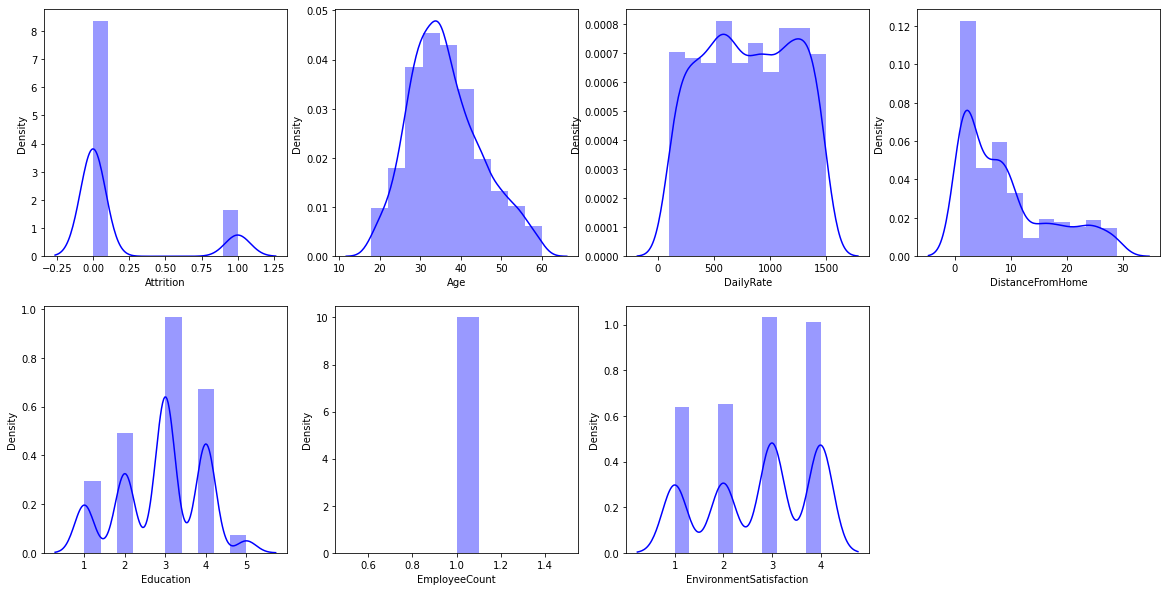

In [14]:
plt.figure(figsize=(20,10))
for i in range(1,8,1):
    plt.subplot(2,4,i)
    sb.distplot(tr[con[i-1]],bins=10,color="blue")


In [15]:
# plt.figure(figsize=(25,40))
# for i in range(1,8,1):
#     if cat[i-1]!="Attrition":
#         plt.subplot(2,4,i)
#         sb.countplot(tr[cat[i-1]],tr["Attrition"],color="green")

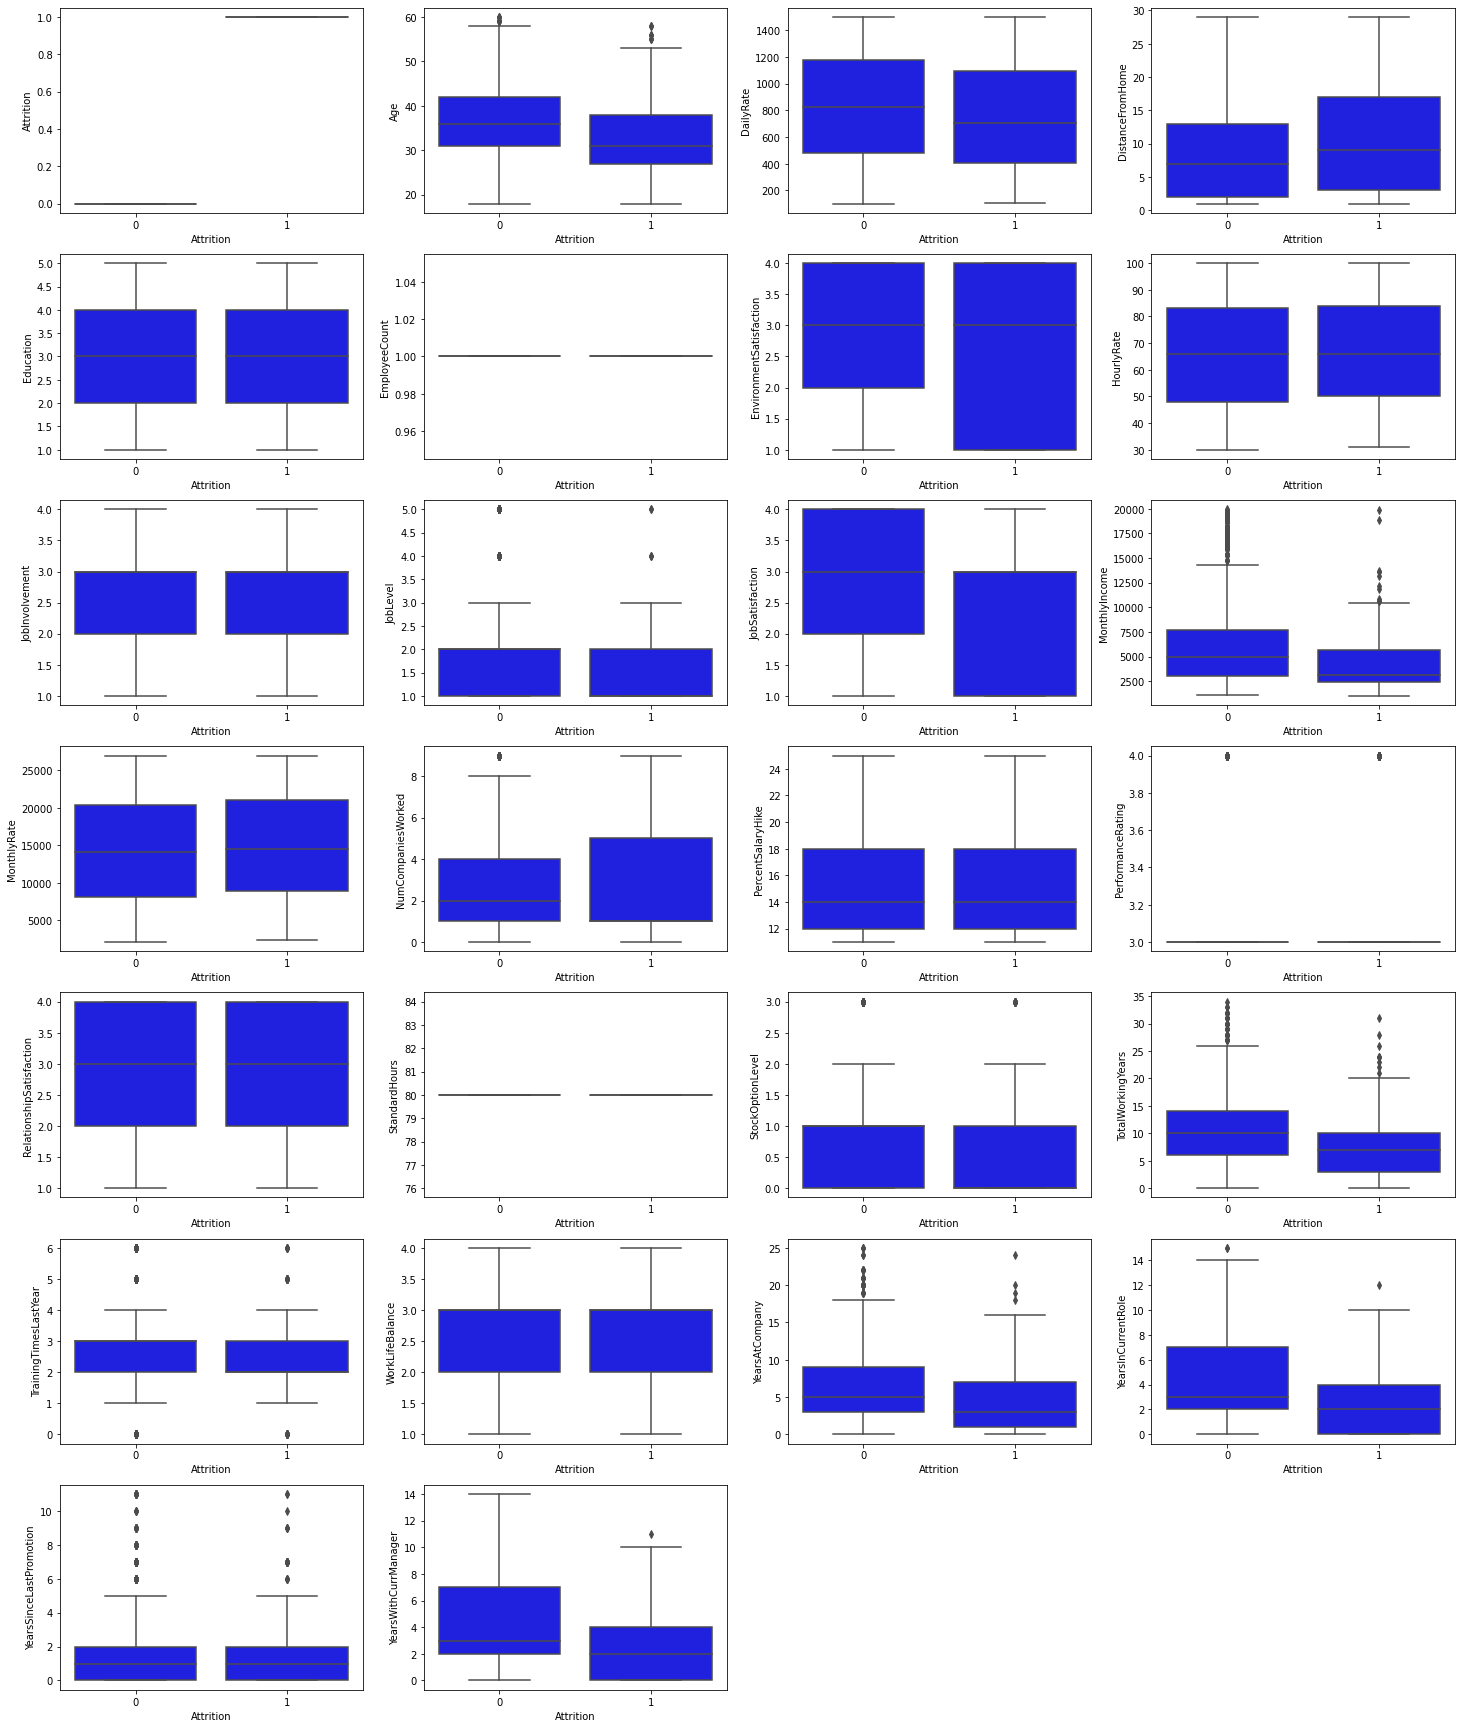

In [16]:
plt.figure(figsize=(25,40))
for i in range(1,27,1):
    plt.subplot(9,4,i)
    sb.boxplot(tr["Attrition"],tr[con[i-1]],color="blue")

In [17]:
con.remove("Attrition")

# Check the skewness of all continuous columns

In [18]:
tr[con].skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EmployeeCount               0.000000
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StandardHours               0.000000
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

# Removing the skewness
To remove skewness, take the log trasnformation of all continous columns.
in Coapplican income column there are some values which are zero. Log of zero is not possible so before taking log replace zero values with small number 1 or 0.1 

In [19]:
for i in con:
    if ((tr[i].skew())>1.2)|((tr[i].skew())<-1.2):
        tr[i]=tr[i].replace({0:0.1})
        tr[i]=np.log(tr[i])

In [20]:
tr[con].skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EmployeeCount               0.000000
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               0.318593
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StandardHours               0.000000
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany             -1.395344
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     0.079039
YearsWithCurrManager        0.694506
dtype: float64

# Declare dependent 'Y' and independent 'X' variables 

In [21]:
Y=tr[["Attrition"]]
X=tr.drop(labels=["Attrition","StandardHours"],axis=1)

In [22]:
con.remove("StandardHours")

# checking the relation if dependent and independent variables

# catagorical to continiuos relation - Annova test

In [23]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
con_col_to_drop = []

for i in con:
    rel = i +" ~ "+"Attrition"
    model=ols(rel,tr).fit()
    Q=anova_lm(model)
    pval=Q.iloc[0:1,4][0]
    print("Attrition v/s ",i,"--->",pval)
    if pval>0.05:
        con_col_to_drop.append(i)

Attrition v/s  Age ---> 2.40174810995728e-09
Attrition v/s  DailyRate ---> 0.03310111298365348
Attrition v/s  DistanceFromHome ---> 0.002300950615078332
Attrition v/s  Education ---> 0.22354556036912335
Attrition v/s  EmployeeCount ---> 1.1401017830578035e-200
Attrition v/s  EnvironmentSatisfaction ---> 2.7249857968743878e-05
Attrition v/s  HourlyRate ---> 0.9545307944011326
Attrition v/s  JobInvolvement ---> 5.528987655548182e-07
Attrition v/s  JobLevel ---> 1.1421855218920342e-10
Attrition v/s  JobSatisfaction ---> 2.013012630705955e-05
Attrition v/s  MonthlyIncome ---> 6.215032041401794e-14
Attrition v/s  MonthlyRate ---> 0.5795705034394918
Attrition v/s  NumCompaniesWorked ---> 0.06102665605978021
Attrition v/s  PercentSalaryHike ---> 0.8156143137992059
Attrition v/s  PerformanceRating ---> 0.6882893160450104
Attrition v/s  RelationshipSatisfaction ---> 0.051296096628896615
Attrition v/s  StockOptionLevel ---> 3.2294517129759054e-07
Attrition v/s  TotalWorkingYears ---> 3.230870303

In [24]:
con_col_to_drop

['Education',
 'HourlyRate',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction']

# catagorical to catogorical replation - Chisquare Test

In [25]:
cat_col_to_drop=[]
from scipy.stats import chi2_contingency
for i in cat:
    Q=pd.crosstab(tr["Attrition"],tr[i])
    a,pval,c,d=chi2_contingency(Q)
    if pval>0.5:
        cat_col_to_drop.append(i)
    print("Attrition v/s ",i,"--->",pval)

Attrition v/s  BusinessTravel ---> 9.025246820675197e-06
Attrition v/s  Department ---> 0.003518846170755682
Attrition v/s  EducationField ---> 0.01269898080085869
Attrition v/s  Gender ---> 0.20187482138327473
Attrition v/s  JobRole ---> 1.795717418076296e-14
Attrition v/s  MaritalStatus ---> 1.6475403386472168e-10
Attrition v/s  Over18 ---> 1.0
Attrition v/s  OverTime ---> 2.098891883915345e-21


In [26]:
cat_col_to_drop

['Over18']

In [27]:
for i in cat_col_to_drop:
    cat.remove(i)

In [28]:
for i in con_col_to_drop:
    con.remove(i)

In [29]:
cat,con

(['BusinessTravel',
  'Department',
  'EducationField',
  'Gender',
  'JobRole',
  'MaritalStatus',
  'OverTime'],
 ['Age',
  'DailyRate',
  'DistanceFromHome',
  'EmployeeCount',
  'EnvironmentSatisfaction',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'StockOptionLevel',
  'TotalWorkingYears',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager'])

# Standradize the data
create one hot encoding for the catagorical columns

scale the continuous valeus in the range of 0 to 1

In [30]:
X1=pd.get_dummies(X[cat],columns=cat)
X1.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [31]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X2= pd.DataFrame(mm.fit_transform(X[con]),columns=con)
X2.head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,0.716332,0.000000,0.0,0.333333,0.666667,0.25,1.000000,0.597078,0.000000,0.235294,0.0,0.000000,0.741533,0.266667,0.000000,0.357143
1,0.738095,0.126791,0.250000,0.0,0.666667,0.333333,0.25,0.333333,0.544970,0.333333,0.294118,0.5,0.666667,0.834049,0.466667,0.489862,0.500000
2,0.452381,0.910458,0.035714,0.0,1.000000,0.333333,0.00,0.666667,0.244043,0.000000,0.205882,0.5,0.666667,0.000000,0.000000,0.000000,0.000000
3,0.357143,0.924069,0.071429,0.0,1.000000,0.666667,0.00,0.666667,0.354852,0.000000,0.235294,0.5,0.666667,0.793635,0.466667,0.723585,0.000000
4,0.214286,0.350287,0.035714,0.0,0.000000,0.666667,0.00,0.333333,0.413757,0.333333,0.176471,0.5,0.666667,0.542562,0.133333,0.637325,0.142857


# create new data frame combining both catagoriacal one hot encoded dataframe and scaled continous columns dataframe

In [32]:
Xnew =X1.join(X2)
Xnew

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Age,DailyRate,DistanceFromHome,EmployeeCount,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0.547619,0.716332,0.000000,0.0,0.333333,0.666667,0.25,1.000000,0.597078,0.000000,0.235294,0.000000,0.000000,0.741533,0.266667,0.000000,0.357143
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0.738095,0.126791,0.250000,0.0,0.666667,0.333333,0.25,0.333333,0.544970,0.333333,0.294118,0.500000,0.666667,0.834049,0.466667,0.489862,0.500000
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0.452381,0.910458,0.035714,0.0,1.000000,0.333333,0.00,0.666667,0.244043,0.000000,0.205882,0.500000,0.666667,0.000000,0.000000,0.000000,0.000000
3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0.357143,0.924069,0.071429,0.0,1.000000,0.666667,0.00,0.666667,0.354852,0.000000,0.235294,0.500000,0.666667,0.793635,0.466667,0.723585,0.000000
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0.214286,0.350287,0.035714,0.0,0.000000,0.666667,0.00,0.333333,0.413757,0.333333,0.176471,0.500000,0.666667,0.542562,0.133333,0.637325,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0.428571,0.560172,0.785714,0.0,0.666667,1.000000,0.25,1.000000,0.313459,0.333333,0.500000,0.500000,0.666667,0.708512,0.133333,0.000000,0.214286
1383,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0.500000,0.366046,0.178571,0.0,1.000000,0.333333,0.50,0.000000,0.768360,0.333333,0.264706,0.833333,0.666667,0.769451,0.466667,0.489862,0.500000
1384,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0.214286,0.037966,0.107143,0.0,0.333333,1.000000,0.25,0.333333,0.605308,0.333333,0.176471,0.000000,0.666667,0.741533,0.133333,0.000000,0.214286
1385,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0.738095,0.659742,0.035714,0.0,1.000000,0.333333,0.25,0.333333,0.561539,0.000000,0.500000,0.500000,0.333333,0.814967,0.400000,0.000000,0.571429


# Divide this dataset into training and testing dataset
using test size = 0.2
    randam state as 42

In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=42)

#As this is classification problem , we will check differnt classifer for this dataset.

whichever calssifier gives best results will be used for final traing

we will try following classifiers
1) Logistic regession

2) Decision Tree

3) k-nearest neighbour

4) Random forest

5) decision tree with Adaboost regressor

# Function for calculating accuracy score of the model

In [34]:
def acc_score(obj):
    
    model = obj.fit(xtrain,ytrain)
    
    tr_pred = model.predict(xtrain)
    ts_pred= model.predict(xtest)
    
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain, tr_pred)
    ts_acc = accuracy_score(ytest, ts_pred)
    
    return tr_acc,ts_acc

# Logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [36]:
acc_score(lr)

(0.8981064021641119, 0.8525179856115108)

# K-Nearest neighbour

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5,n_jobs=500)

In [38]:
acc_score(knc)

(0.8800721370604148, 0.8309352517985612)

# Decision Tree classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc_1 = DecisionTreeClassifier(criterion="gini")
dtc_2 = DecisionTreeClassifier(criterion="entropy")

In [40]:
acc_score(dtc_1)

(1.0, 0.8237410071942446)

In [41]:
acc_score(dtc_2)

(1.0, 0.8489208633093526)

In [42]:
for i in range(2,30):
    dtc_3=DecisionTreeClassifier(max_depth=i)
    print(i,acc_score(dtc_3))

2 (0.8476104598737602, 0.8165467625899281)
3 (0.8656447249774571, 0.8381294964028777)
4 (0.8818755635707844, 0.8309352517985612)
5 (0.8981064021641119, 0.8453237410071942)
6 (0.9224526600541028, 0.8345323741007195)
7 (0.9440937781785392, 0.8381294964028777)
8 (0.9621280432822362, 0.8237410071942446)
9 (0.9783588818755635, 0.8345323741007195)
10 (0.9855725879170424, 0.8165467625899281)
11 (0.9945897204688909, 0.8201438848920863)
12 (0.9990982867448152, 0.7985611510791367)
13 (1.0, 0.8201438848920863)
14 (1.0, 0.8237410071942446)
15 (1.0, 0.7985611510791367)
16 (1.0, 0.8201438848920863)
17 (1.0, 0.8093525179856115)
18 (1.0, 0.8345323741007195)
19 (1.0, 0.8201438848920863)
20 (1.0, 0.8309352517985612)
21 (1.0, 0.8165467625899281)
22 (1.0, 0.8093525179856115)
23 (1.0, 0.8093525179856115)
24 (1.0, 0.8273381294964028)
25 (1.0, 0.8273381294964028)
26 (1.0, 0.8237410071942446)
27 (1.0, 0.8201438848920863)
28 (1.0, 0.8057553956834532)
29 (1.0, 0.8201438848920863)


In [43]:
for i in range(2,10):
    dtc_4=DecisionTreeClassifier(min_samples_split=i)
    print(i,acc_score(dtc_3))

2 (1.0, 0.8273381294964028)
3 (1.0, 0.8273381294964028)
4 (1.0, 0.8237410071942446)
5 (1.0, 0.8093525179856115)
6 (1.0, 0.8273381294964028)
7 (1.0, 0.8201438848920863)
8 (1.0, 0.8093525179856115)
9 (1.0, 0.8237410071942446)


In [44]:
for i in range(2,30):
    dtc_5=DecisionTreeClassifier(max_leaf_nodes=i)
    print(i,acc_score(dtc_3))

2 (1.0, 0.8345323741007195)
3 (1.0, 0.8237410071942446)
4 (1.0, 0.8309352517985612)
5 (1.0, 0.8129496402877698)
6 (1.0, 0.8129496402877698)
7 (1.0, 0.802158273381295)
8 (1.0, 0.8165467625899281)
9 (1.0, 0.8165467625899281)
10 (1.0, 0.8057553956834532)
11 (1.0, 0.8201438848920863)
12 (1.0, 0.8129496402877698)
13 (1.0, 0.8165467625899281)
14 (1.0, 0.8273381294964028)
15 (1.0, 0.8201438848920863)
16 (1.0, 0.8309352517985612)
17 (1.0, 0.8237410071942446)
18 (1.0, 0.8309352517985612)
19 (1.0, 0.8237410071942446)
20 (1.0, 0.8201438848920863)
21 (1.0, 0.8237410071942446)
22 (1.0, 0.8201438848920863)
23 (1.0, 0.8165467625899281)
24 (1.0, 0.8201438848920863)
25 (1.0, 0.8129496402877698)
26 (1.0, 0.8309352517985612)
27 (1.0, 0.802158273381295)
28 (1.0, 0.8345323741007195)
29 (1.0, 0.8165467625899281)


# tuning the decision tree model for best parameters

In [45]:
tg = {
    "criterion" : ["gini","entropy"],
    "max_depth" : range(2,20,1),
    "min_samples_split" : range(2,20,1),
    "max_leaf_nodes" : range(2,20,1)
    }

In [46]:
# dtc_6=DecisionTreeClassifier(random_state=42)
# from sklearn.model_selection import GridSearchCV
# cv=GridSearchCV(dtc_6,tg,cv=5,n_jobs=60,scoring="accuracy")

In [47]:
# cv.fit(xtrain,ytrain)
# cv.best_estimator_,cv.best_score_,cv.best_params_

In [48]:
#import sklearn.metrics
#sklearn.metrics.get_scorer_names()

# Randoam forest classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)

In [50]:
acc_score(rfc)

(1.0, 0.8381294964028777)

# Adaboost classifier

In [51]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion="gini",max_depth=2,random_state=42),n_estimators=500,random_state=42)

In [52]:
acc_score(abc)

(1.0, 0.841726618705036)

# Boosting different alogs for better test accuracy

In [53]:
abc_2=AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=2),n_estimators=500,random_state=42)

In [54]:
acc_score(abc_2)

(1.0, 0.8489208633093526)

In [55]:
abc_4=AdaBoostClassifier(base_estimator=lr,n_estimators=500,random_state=42)
acc_score(abc_4)

(0.8899909828674482, 0.8597122302158273)

# Selecting Best Model

By comparing accuracy of different models, it seems Logistic regression model with Adaboostregressor gives best traing and testing accuracy score

In [56]:
abc_5=AdaBoostClassifier(base_estimator=lr,n_estimators=500)

In [57]:
final_model=abc_5.fit(Xnew,Y)

In [58]:
final_model.score(Xnew,Y)

0.8774333093006489